In [64]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score

train_url = "train.csv"
test_url = "test.csv"

df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

X_train = df_train.drop(['id', 'is_anomaly'], axis=1)
y_train = df_train['is_anomaly']

model_if = IsolationForest(max_samples=256)
model_if.fit(X_train)

y_score_IF = model_if.decision_function(X_train)

y_score_IF_binary = [1 if score < 0 else 0 for score in y_score_IF]

auc_IF = roc_auc_score(y_train, y_score_IF_binary)

print("AUC-ROC Score for Isolation Forest:", auc_IF)


AUC-ROC Score for Isolation Forest: 0.47417582417582416


max_samples (256) is greater than the total number of samples (144). max_samples will be set to n_samples for estimation.


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X = train_data.drop(['id', 'is_anomaly'], axis=1)  
y = train_data['is_anomaly']  
X_test = test_data.drop(['id'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_val)
y_pred_proba = rf_classifier.predict_proba(X_val)[:, 1]  # Probabilities for ROC AUC


classification_rep = classification_report(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

roc_auc


C:\Users\baciv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baciv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baciv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9743589743589743

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

train_data_path = 'train.csv'
test_data_path = 'test.csv'
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

X = train_data.drop(['id', 'is_anomaly'], axis=1)  
y = train_data['is_anomaly'] 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


class_weights = {0: 1, 1: len(y_train) / y_train.sum()}  
rf_classifier_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
rf_classifier_weighted.fit(X_train, y_train)

y_pred_proba_weighted = rf_classifier_weighted.predict_proba(X_val)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba_weighted)

threshold = 0.33
test_predictions_weighted = (rf_classifier_weighted.predict_proba(test_data.drop(['id'], axis=1))[:, 1] >= threshold).astype(int)

submission_df_weighted = pd.DataFrame({
    'id': test_data['id'],
    'is_anomaly': test_predictions_weighted
})
submission_file_weighted_path = 'submission.csv'
submission_df_weighted.to_csv(submission_file_weighted_path, index=False)


---


In [53]:
# Afișați dimensiunea datelor și a etichetelor
print("Dimensiunea datelor: ", X_train.shape)
print("Dimensiunea etichetelor: ", y_train.shape)

# Afișați minimul, maximul, media și deviația standard a fiecărei trăsături din date (fiecare coloană din X)
print("Minime: ", np.min(X_train, axis=0))
print("Maxime: ", np.max(X_train, axis=0))
print("Medii: ", np.mean(X_train, axis=0))
print("Deviații standard: ", np.std(X_train, axis=0))

# Afișați numărul de anomalii
print("Numarul de anomalii: ", np.sum(y_train == 1))

Dimensiunea datelor:  (115, 6)
Dimensiunea etichetelor:  (115,)
Minime:  feature_0    31.758570
feature_1    -3.653628
feature_2    18.995085
feature_3    12.791948
feature_4    70.660124
feature_5    -8.547784
dtype: float64
Maxime:  feature_0    128.573395
feature_1     48.715990
feature_2     94.829946
feature_3    122.478511
feature_4    163.339675
feature_5    419.262574
dtype: float64
Medii:  feature_0     64.895714
feature_1     19.761283
feature_2     54.782395
feature_3     45.228710
feature_4    117.125535
feature_5     38.498530
dtype: float64
Deviații standard:  feature_0    18.157709
feature_1    10.563543
feature_2    18.432908
feature_3    14.837688
feature_4    14.654824
feature_5    49.342248
dtype: float64
Numarul de anomalii:  11


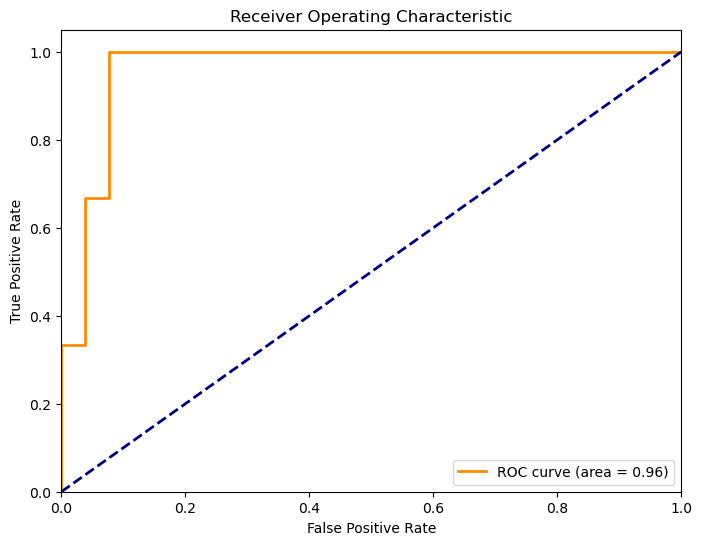

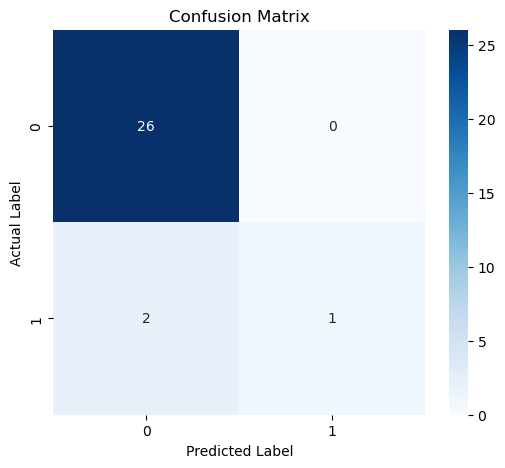

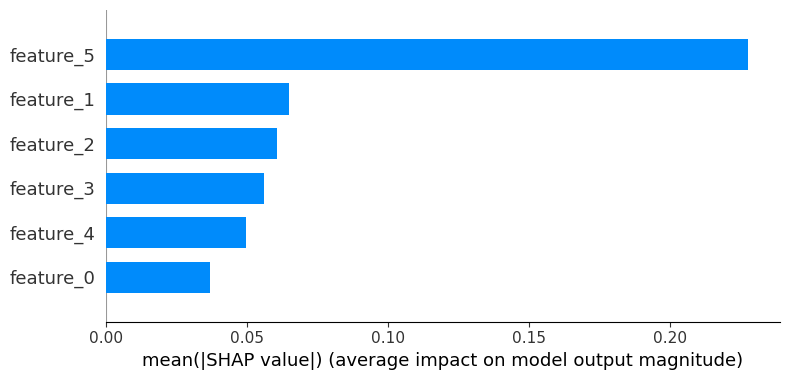

(0.5, 1.0, 0.3333333333333333, 0.9615384615384616)

In [58]:
from sklearn.metrics import f1_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from tqdm import tqdm
import shap

y_pred_val = rf_classifier_weighted.predict(X_val)

#Calculating metrics
f1 = f1_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)

#ROC curve and AUC
fpr, tpr, _  = roc_curve(y_val, y_pred_proba_weighted)
roc_auc = auc(fpr, tpr)

#Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_val)

#SHAP values to understand feature importance
explainer = shap.TreeExplainer(rf_classifier_weighted)
shap_values = explainer.shap_values(X_train)

#Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#Plotting SHAP summary plot
shap.summary_plot(shap_values[1], X_train, plot_type='bar')

f1, precision, recall, roc_auc

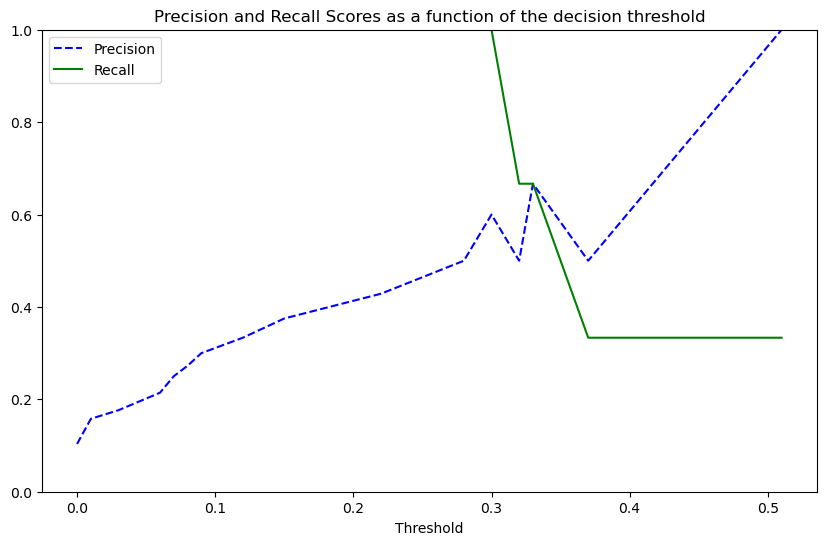

(array([0.10344828, 0.15789474, 0.17647059, 0.21428571, 0.25      ,
        0.27272727, 0.3       , 0.33333333, 0.375     , 0.42857143,
        0.5       , 0.6       , 0.5       , 0.66666667, 0.5       ,
        1.        , 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.66666667, 0.66666667, 0.33333333,
        0.33333333, 0.        ]),
 array([0.  , 0.01, 0.03, 0.06, 0.07, 0.08, 0.09, 0.12, 0.15, 0.22, 0.28,
        0.3 , 0.32, 0.33, 0.37, 0.51]))

In [60]:
from sklearn.metrics import precision_recall_curve

# Adjusting class weights in the Random Forest classifier
class_weights = {0: 1, 1: len(y_train) / y_train.sum()}  
rf_classifier_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
rf_classifier_weighted.fit(X_train, y_train)

y_pred_proba_weighted = rf_classifier_weighted.predict_proba(X_val)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba_weighted)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.show()

precision, recall, thresholds

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating i

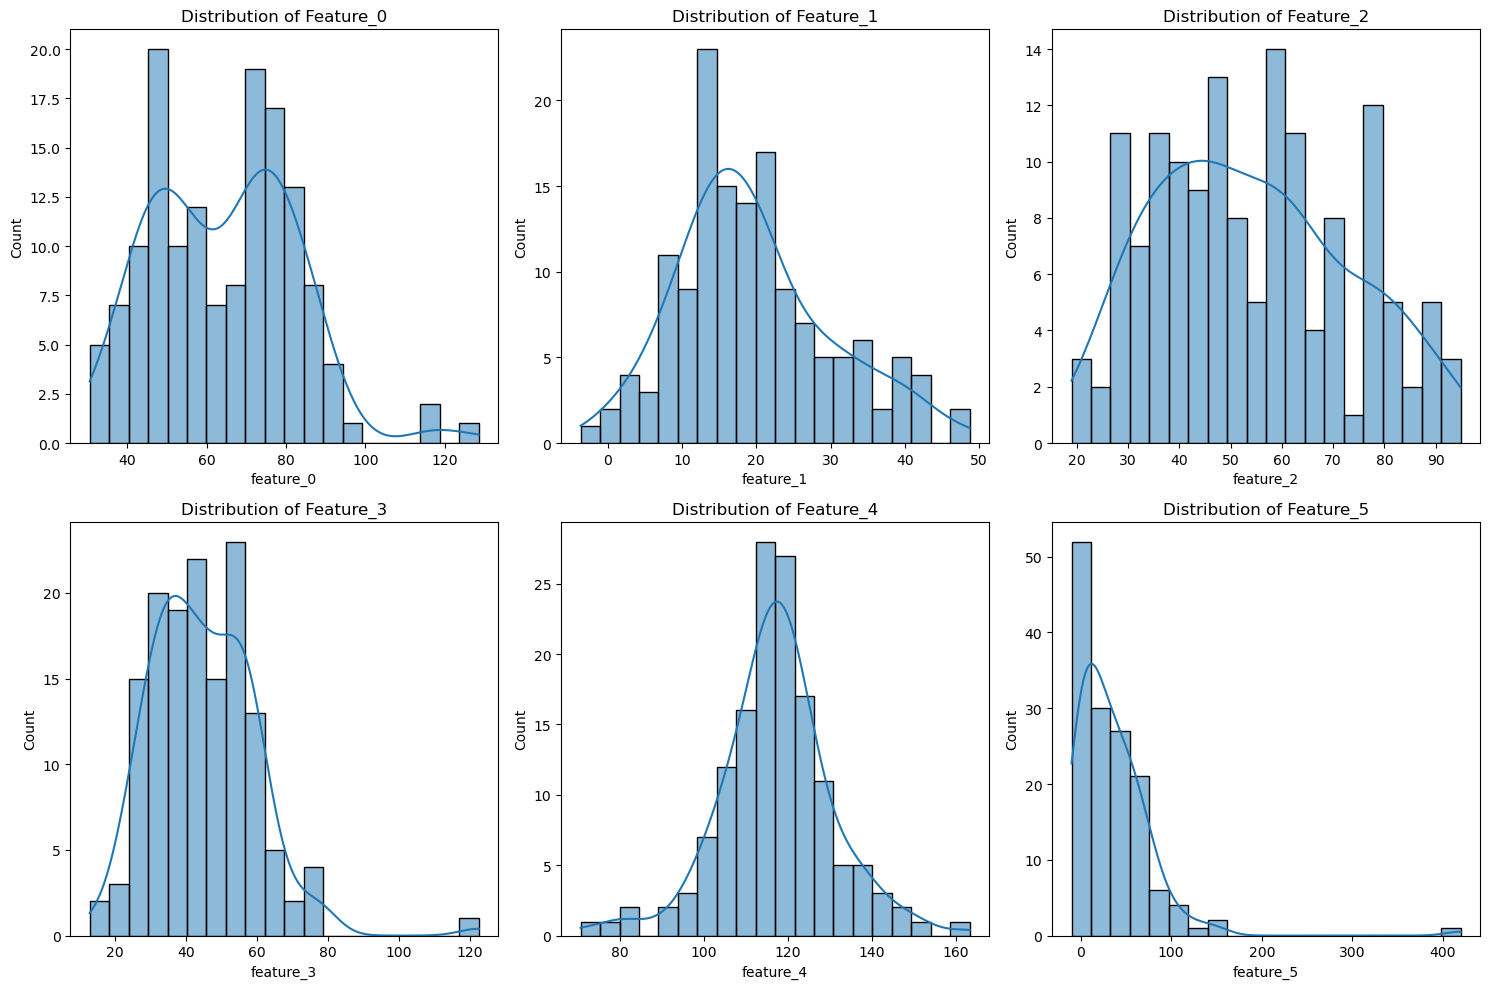

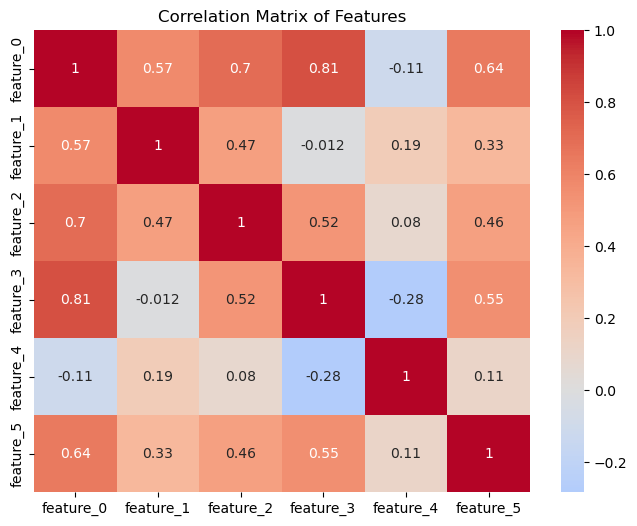

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


#Plotting histograms for each feature in the training data
plt.figure(figsize=(15, 10))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    sns.histplot(train_data[f'feature_{i}'], kde=True, bins=20)
    plt.title(f'Distribution of Feature_{i}')

plt.tight_layout()
plt.show()

#Plotting a heatmap to visualize the correlations between features
correlation_matrix = train_data.drop(['id', 'is_anomaly'], axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()